# HAM10000 Training with Distance Weight

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random
import pickle

import torch
import torch.nn as nn
import torch.optim as optim

# created library
import mydata
from mymodels import TransDataset, LoadDataset, VGG16Model, ResNet50Model, EfficientB7Model

In [2]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない
from distancetraining import ModelTrainer

# Efficientnet

In [3]:
db = "HAM"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

In [4]:
df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [5]:
ycol="labels"
batch_size = 8 # １インプットずつペナルティを付加するため

ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (450, 600)


Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.5475
Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.6643
Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.7401
Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.7744
Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.8037
Validation Accuracy: 0.5000 | Loss: 0.0006 | F1: 0.0000 | AUC: 0.8330
Validation Accuracy: 0.5046 | Loss: 0.0006 | F1: 0.0183 | AUC: 0.8604
Validation Accuracy: 0.5346 | Loss: 0.0005 | F1: 0.1293 | AUC: 0.8732
Validation Accuracy: 0.5668 | Loss: 0.0005 | F1: 0.2480 | AUC: 0.8838
Validation Accuracy: 0.6014 | Loss: 0.0005 | F1: 0.3569 | AUC: 0.8904
Validation Accuracy: 0.6129 | Loss: 0.0005 | F1: 0.4043 | AUC: 0.8979
Validation Accuracy: 0.6152 | Loss: 0.0005 | F1: 0.3971 | AUC: 0.8999
Validation Accuracy: 0.6682 | Loss: 0.0004 | F1: 0.5294 | AUC: 0.9074
Validation Accuracy: 0.7051 | Loss: 0.0004 | F1: 0.6049 | AUC: 0.9110
Validation Accuracy:

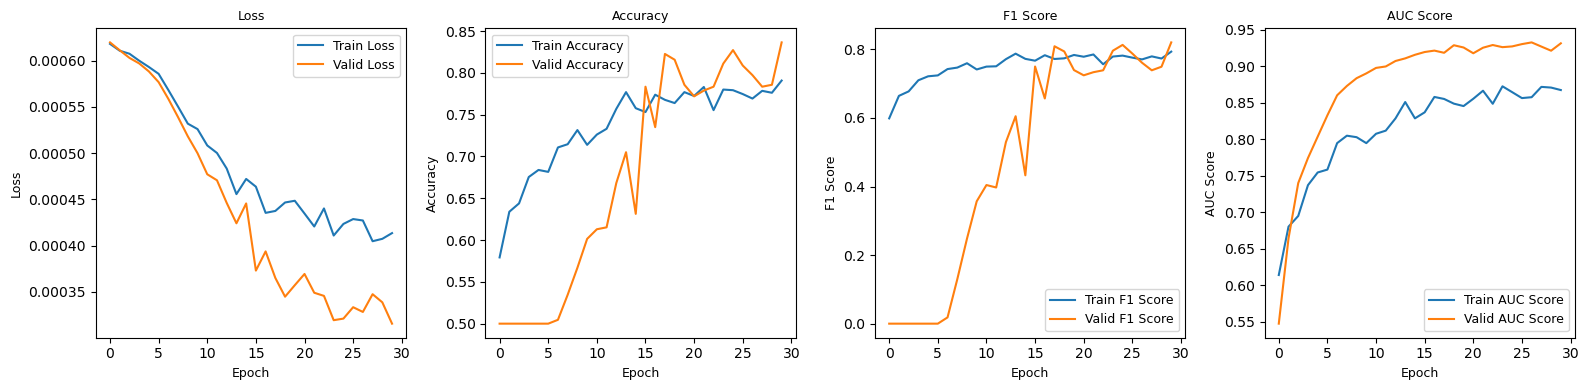

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 30
lr = 1e-5
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [7]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       217
           1       0.87      0.82      0.84       217

    accuracy                           0.85       434
   macro avg       0.85      0.85      0.85       434
weighted avg       0.85      0.85      0.85       434

Skin tone 1: Accuracy 0.847926267281106


In [8]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       217
           1       0.87      0.80      0.83       217

    accuracy                           0.84       434
   macro avg       0.84      0.84      0.84       434
weighted avg       0.84      0.84      0.84       434

Skin tone 1: Accuracy 0.8387096774193549


# Resnet

In [9]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered interna

Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7493
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7466
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7436
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7217
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7751
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7737
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7931
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7826
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.7853
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.8261
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.8114
Validation Accuracy: 0.5000 | Loss: 0.0011 | F1: 0.0000 | AUC: 0.8237
Validation Accuracy: 0.5000 | Loss: 0.0010 | F1: 0.0000 | AUC: 0.8249
Validation Accuracy: 0.5000 | Loss: 0.0010 | F1: 0.0000 | AUC: 0.8316
Validation Accuracy:

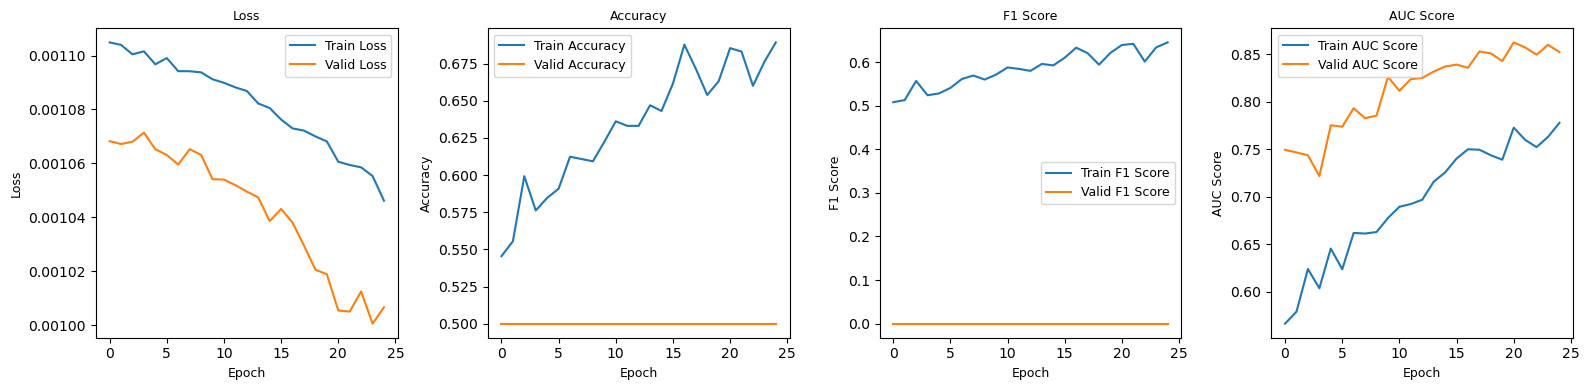

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 25
lr = 1e-6
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.91      0.59      0.72       217
           1       0.70      0.94      0.80       217

    accuracy                           0.77       434
   macro avg       0.81      0.77      0.76       434
weighted avg       0.81      0.77      0.76       434

Skin tone 1: Accuracy 0.7695852534562212


In [12]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.86      0.60      0.70       217
           1       0.69      0.90      0.78       217

    accuracy                           0.75       434
   macro avg       0.77      0.75      0.74       434
weighted avg       0.77      0.75      0.74       434

Skin tone 1: Accuracy 0.7488479262672811


# VGG

In [6]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
polynomial_save_file = f"{root}model/pickle/polynomial_model_{model_name}.pkl"
model_save_directory = f"{root}/novel_model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}_novel.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}_novel.csv"

Validation Accuracy: 0.5023 | Loss: 0.0016 | F1: 0.0092 | AUC: 0.8210
Validation Accuracy: 0.6866 | Loss: 0.0015 | F1: 0.5556 | AUC: 0.8604
Validation Accuracy: 0.7949 | Loss: 0.0014 | F1: 0.7982 | AUC: 0.8772
Validation Accuracy: 0.8134 | Loss: 0.0013 | F1: 0.8129 | AUC: 0.8833
Validation Accuracy: 0.7995 | Loss: 0.0013 | F1: 0.8079 | AUC: 0.8804
Validation Accuracy: 0.8088 | Loss: 0.0012 | F1: 0.8176 | AUC: 0.8867
Validation Accuracy: 0.8134 | Loss: 0.0012 | F1: 0.8220 | AUC: 0.8912
Validation Accuracy: 0.8157 | Loss: 0.0012 | F1: 0.8333 | AUC: 0.8981
Validation Accuracy: 0.8180 | Loss: 0.0011 | F1: 0.8271 | AUC: 0.8985
Validation Accuracy: 0.8134 | Loss: 0.0011 | F1: 0.8330 | AUC: 0.9029
Validation Accuracy: 0.8272 | Loss: 0.0011 | F1: 0.8434 | AUC: 0.8994
Validation Accuracy: 0.8203 | Loss: 0.0011 | F1: 0.8382 | AUC: 0.9034
Validation Accuracy: 0.8180 | Loss: 0.0011 | F1: 0.8364 | AUC: 0.9065
Validation Accuracy: 0.8295 | Loss: 0.0011 | F1: 0.8419 | AUC: 0.9037
Validation Accuracy:

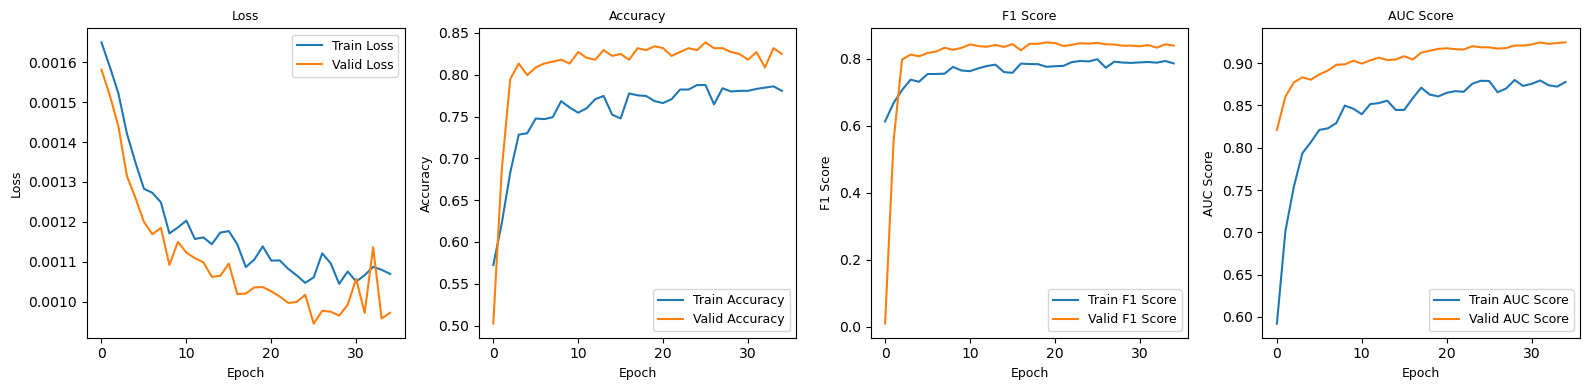

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VGG16Model().to(device) # model -> GPU

# Load model
with open(polynomial_save_file, "rb") as f:
    polynomial_model = pickle.load(f)

num_epochs = 35
lr = 1e-6
trainer = ModelTrainer(polynomial_model, model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [8]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_valid_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       217
           1       0.75      0.94      0.84       217

    accuracy                           0.82       434
   macro avg       0.84      0.82      0.81       434
weighted avg       0.84      0.82      0.81       434

Skin tone 1: Accuracy 0.815668202764977


In [9]:
test_predictions = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp.to_csv(df_test_filepath, index=False)

trainer.report(tmp)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       217
           1       0.77      0.92      0.83       217

    accuracy                           0.82       434
   macro avg       0.83      0.82      0.82       434
weighted avg       0.83      0.82      0.82       434

Skin tone 1: Accuracy 0.8179723502304147
